In [1]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


3.1.1 

In [4]:
!git clone https://github.com/ashanW004/ETM4272.git

Cloning into 'ETM4272'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 136 (delta 34), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (136/136), 13.00 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [5]:
img = cv2.imread("/content/ETM4272/demo5_images/cars1.jpg")

100%|██████████| 137M/137M [00:01<00:00, 134MB/s]



0: 416x640 14 cars, 88.8ms
Speed: 12.9ms preprocess, 88.8ms inference, 347.7ms postprocess per image at shape (1, 3, 416, 640)


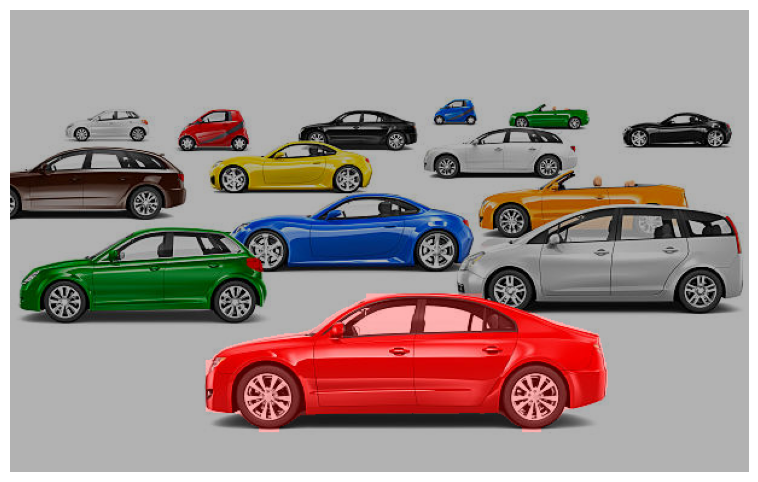

In [6]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 segmentation model
model = YOLO('yolov8x-seg.pt')  # Using the largest segmentation model

# Load the image
img = cv2.imread("/content/ETM4272/demo5_images/cars1.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run segmentation on the image
results = model(image)

# Get segmentation masks
masks = results[0].masks.xy  # List of masks (each mask is a set of polygon points)
boxes = results[0].boxes.xyxy  # Bounding boxes

# Find the largest car based on bounding box area
largest_idx = None
max_area = 0

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    area = (x2 - x1) * (y2 - y1)
    if area > max_area:
        max_area = area
        largest_idx = i

# Draw the mask for the largest car
if largest_idx is not None:
    mask = np.array(masks[largest_idx], dtype=np.int32)

    # Draw filled polygon mask on a blank image
    mask_img = np.zeros_like(image)
    cv2.fillPoly(mask_img, [mask], (255, 0, 0))  # Red mask for visualization

    # Overlay mask on the original image
    overlaid = cv2.addWeighted(image, 0.7, mask_img, 0.3, 0)

    # Display the image with the largest car's mask
    plt.figure(figsize=(10, 6))
    plt.imshow(overlaid)
    plt.axis("off")
    plt.show()


3.2 

100%|██████████| 131M/131M [00:00<00:00, 341MB/s]



0: 384x640 1 chair, 68.9ms
Speed: 2.2ms preprocess, 68.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Chair detected at: (241, 19), (464, 347)
Centroid: (352, 183)


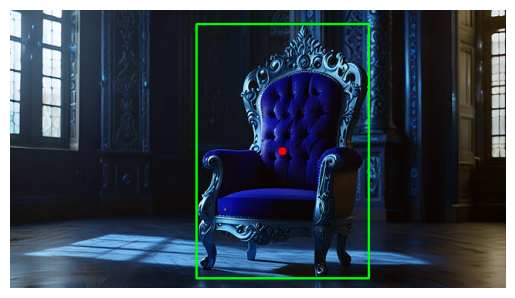

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

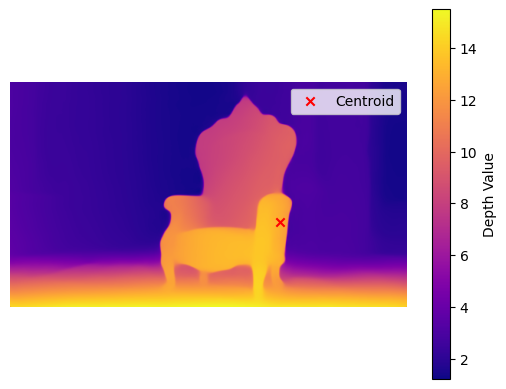

Depth at centroid (352, 183): 12.889397621154785
Estimated Distance to Chair: 12.89 meters


In [7]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import supervision as sv
from transformers import AutoProcessor
from transformers import AutoModelForDepthEstimation

# Load YOLOv8 model for object detection
model = YOLO('yolov8x.pt')  # YOLOv8x for high accuracy

# Load the image
image_path = "/content/ETM4272/demo5_images/kingChair.jpg"  # Updated image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image)

# Initialize centroid coordinates
centroid_x, centroid_y = None, None

# Extract bounding box of chair
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])  # Class ID
        if model.names[cls] == "chair":  # Check if detected object is a chair
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            centroid_x = (x1 + x2) // 2
            centroid_y = (y1 + y2) // 2
            print(f"Chair detected at: ({x1}, {y1}), ({x2}, {y2})")
            print(f"Centroid: ({centroid_x}, {centroid_y})")

            # Draw bounding box and centroid
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.circle(image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)

# Save and display detected image
detected_image_path = "detected_chair.jpg"
cv2.imwrite(detected_image_path, image)

# Show detected image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Check if centroid was found
if centroid_x is None or centroid_y is None:
    print("No chair detected!")
else:
    # Load Depth Anything V2 model
    # Load Depth Anything V2 model
    processor = AutoProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
    depth_model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

    # Convert image to PIL format
    image_pil = Image.open(image_path).convert("RGB")

    # Get depth map
    inputs = processor(image_pil, return_tensors="pt")
    with torch.no_grad():
        depth_output = depth_model(**inputs).predicted_depth

    # Convert depth map to NumPy array
    depth_map = depth_output.squeeze().cpu().numpy()

    # Show depth map
    plt.imshow(depth_map, cmap="plasma")
    plt.colorbar(label="Depth Value")
    plt.scatter(centroid_x, centroid_y, color="red", marker="x", label="Centroid")
    plt.legend()
    plt.axis("off")
    plt.show()

    # Query depth value at centroid
    depth_value = depth_map[centroid_y, centroid_x]
    print(f"Depth at centroid ({centroid_x}, {centroid_y}): {depth_value}")
    # Display results
    print(f"Estimated Distance to Chair: {depth_value:.2f} meters")


3.3.1 Draw bounding boxes around the "cars" using supervision.

In [8]:
import gdown

url = "https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
output = "vehicles_video.mp4"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: /content/vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:01<00:00, 28.3MB/s]


'vehicles_video.mp4'

In [9]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolo11n.pt")  # Ensure the model file is present

# Define a BoxAnnotator instance (for drawing bounding boxes)
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO on the frame
    results = model(frame)

    # Convert results to Supervision format
    detections = sv.Detections.from_ultralytics(results[0])

    # Annotate frame using the BoxAnnotator
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)

    return annotated_frame

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)

print("Processing complete. Check 'result_tracking.mp4'")


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]



0: 384x640 3 cars, 1 truck, 46.8ms
Speed: 3.0ms preprocess, 46.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 14.4ms
Speed: 5.5ms preprocess, 14.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 14.2ms
Speed: 3.8ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 14.4ms
Speed: 3.8ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 16.9ms
Speed: 4.0ms preprocess, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 14.8ms
Speed: 5.3ms preprocess, 14.8ms i

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [10]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")  # Ensure this model exists

# Create a ByteTrack tracker
tracker = sv.ByteTrack()

# Define the BoxAnnotator
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO on the frame
    results = model(frame)

    # Convert YOLO results to Supervision detections
    detections = sv.Detections.from_ultralytics(results[0])

    # Update tracker with new detections
    detections = tracker.update_with_detections(detections)

    # Generate labels with tracker ID
    labels = [f"ID {round(tracker_id)}" for tracker_id in detections.tracker_id]

    # Annotate frame with bounding boxes and tracker IDs
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)

    # Add labels manually using Supervision's LabelAnnotator
    label_annotator = sv.LabelAnnotator()
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    return annotated_frame

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="tracked_cars.mp4",
    callback=callback
)

print("✅ Processing complete! Check 'tracked_cars.mp4'")


100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]



0: 384x640 3 cars, 1 truck, 33.4ms
Speed: 3.6ms preprocess, 33.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 22.9ms
Speed: 3.8ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 24.1ms
Speed: 3.8ms preprocess, 24.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 10.4ms
Speed: 4.0ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 22.3ms
Speed: 3.7ms preprocess, 22.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 20.8ms
Speed: 4.9ms preprocess, 20.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 19.4ms
Speed: 3.8ms preprocess, 19.4ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.6ms
Speed: 3.7ms

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [11]:
import numpy as np
import supervision as sv
from ultralytics import YOLO
import cv2  # OpenCV for drawing traces

# Load YOLO model
model = YOLO("yolov8n.pt")  # Ensure this model exists

# Create a ByteTrack tracker
tracker = sv.ByteTrack()

# Define the BoxAnnotator
box_annotator = sv.BoxAnnotator()

# Dictionary to store car paths (each car's tracked positions)
car_paths = {}

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO on the frame
    results = model(frame)

    # Convert YOLO results to Supervision detections
    detections = sv.Detections.from_ultralytics(results[0])

    # Update tracker with new detections
    detections = tracker.update_with_detections(detections)

    # Generate labels with rounded tracker ID
    labels = [f"ID {round(tracker_id)}" for tracker_id in detections.tracker_id]

    # Track the positions of each car over time
    for tracker_id, bbox in zip(detections.tracker_id, detections.xyxy):  # Use detections.xyxy
        if tracker_id not in car_paths:
            car_paths[tracker_id] = []  # Initialize path for this car
        # Save the current position (center of the bounding box)
        center = ((bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2)
        car_paths[tracker_id].append(center)

    # Draw traces for each car
    for tracker_id, path in car_paths.items():
        # Ensure there are at least two points to draw a line
        if len(path) > 1:
            for i in range(1, len(path)):
                cv2.line(frame, tuple(map(int, path[i - 1])), tuple(map(int, path[i])), (0, 255, 0), 2)

    # Annotate frame with bounding boxes and tracker IDs
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)

    # Add labels manually using Supervision's LabelAnnotator
    label_annotator = sv.LabelAnnotator()
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    return annotated_frame

# Process the video
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="tracked_cars_with_traces.mp4",
    callback=callback
)

print("✅ Processing complete! Check 'tracked_cars_with_traces.mp4'")



0: 384x640 3 cars, 1 truck, 9.3ms
Speed: 2.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 13.0ms
Speed: 3.5ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 9.8ms
Speed: 4.3ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 bus, 1 truck, 10.7ms
Speed: 3.9ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 10.6ms
Speed: 3.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 bus, 1 truck, 17.6ms
Speed: 3.6ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 9.6ms
Speed: 4.5ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 11.0ms
Speed: 3.5ms prepr

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does.


---


The function definition def callback(frame: np.ndarray, _: int) -> np.ndarray: declares a callback function designed to process a numpy array (typically an image/video frame) and return a modified numpy array. Here's a breakdown:

**Key Components:**

Parameters:

frame: np.ndarray:
A numpy array representing input data (e.g., an image or video frame).

_: int:
An integer argument (conventionally named _ to indicate it is intentionally ignored/unused by the function).

Return Type:

-> np.ndarray:
The function returns a processed/modified numpy array (e.g., a filtered or transformed version of frame).

Purpose:
This function is typically passed to another system (e.g., a video processing pipeline) that invokes it repeatedly (e.g., for each frame in a video stream).

The second parameter (often a frame index, timestamp, or unused flag) is included for API compatibility but not used in the function's logic.

**Completed section**